In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

In [2]:
bigdata = pd.read_csv("../data/imbalance_1h.csv")

In [3]:
bigdata.head()

,datetime,1,2,weekday,date
0,2013-12-31 23:00:00,917.118,92.620,1,2013-12-31
1,2014-01-01 00:00:00,1264.266,82.465,2,2014-01-01
2,2014-01-01 01:00:00,746.810,50.305,2,2014-01-01
3,2014-01-01 02:00:00,-15.512,-42.080,2,2014-01-01
4,2014-01-01 03:00:00,-36.904,-28.995,2,2014-01-01


In [4]:
bigdata = bigdata[['datetime', '1']]

In [5]:
bigdata.rename(columns={'1': 'imbalance_price_target'}, inplace=True)

In [6]:
bigdata = bigdata.set_index('datetime')

In [7]:
bigdata.index = pd.to_datetime(bigdata.index)

In [8]:
# add time features
bigdata['year'] = bigdata.index.year
bigdata['month'] = bigdata.index.month
bigdata['day'] = bigdata.index.day
bigdata['weekday'] = bigdata.index.weekday
bigdata['hour'] = bigdata.index.hour

In [9]:
bigdata

,imbalance_price_target,year,month,day,weekday,hour
datetime,,,,,,
2013-12-31 23:00:00,917.118000,2013,12,31,1,23
2014-01-01 00:00:00,1264.266000,2014,1,1,2,0
2014-01-01 01:00:00,746.810000,2014,1,1,2,1
2014-01-01 02:00:00,-15.512000,2014,1,1,2,2
2014-01-01 03:00:00,-36.904000,2014,1,1,2,3
...,...,...,...,...,...,...
2021-05-22 18:00:00,-1.051667,2021,5,22,5,18
2021-05-22 19:00:00,14.628167,2021,5,22,5,19
2021-05-22 20:00:00,30.308000,2021,5,22,5,20


<AxesSubplot:>

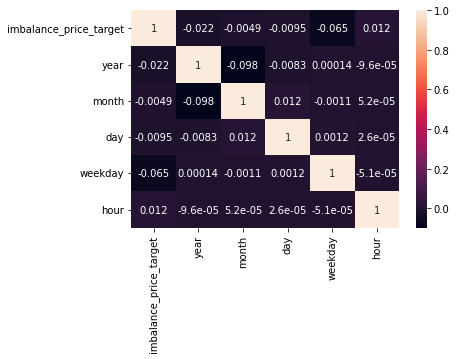

In [10]:
sns.heatmap(bigdata.corr(), annot=True)

### Plots

Text(0.5, 1.0, 'Years')

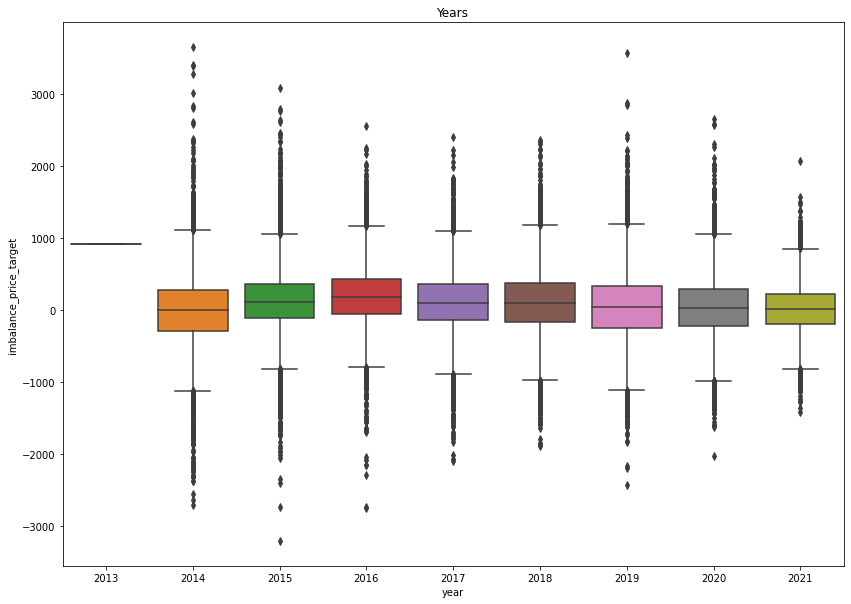

In [70]:
plt.figure(figsize=(14,10))
sns.boxplot(data=bigdata, x=bigdata['year'], y=bigdata['imbalance_price_target'])
plt.title('Years')

Text(0.5, 1.0, 'Months')

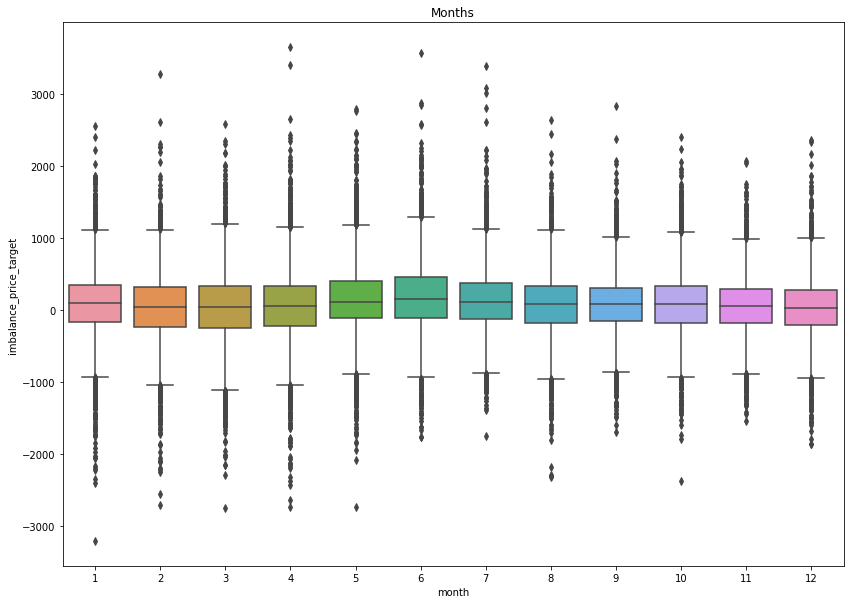

In [68]:
plt.figure(figsize=(14,10))
sns.boxplot(data=bigdata, x=bigdata['month'], y=bigdata['imbalance_price_target'])
plt.title('Months')

Text(0.5, 1.0, 'Weekdays')

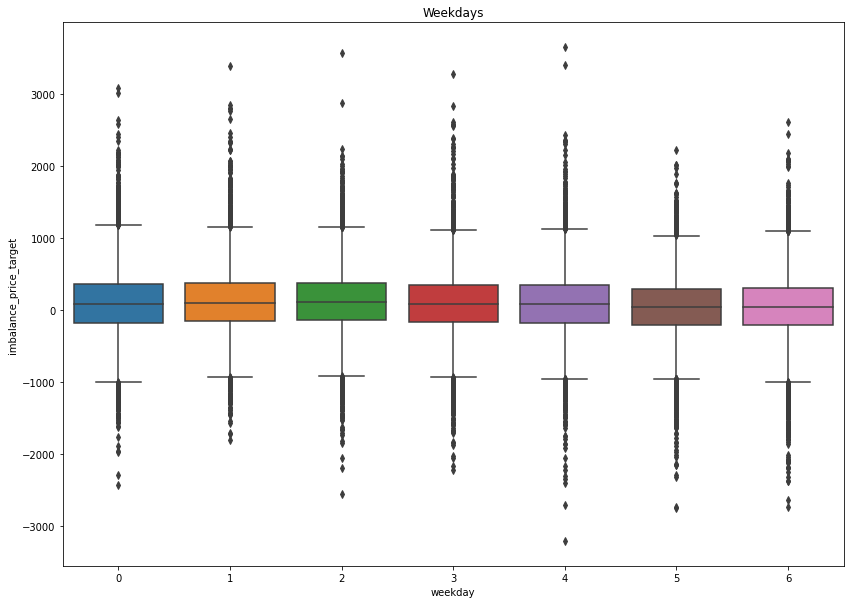

In [69]:
plt.figure(figsize=(14,10))
sns.boxplot(data=bigdata, x=bigdata['weekday'], y=bigdata['imbalance_price_target'])
plt.title('Weekdays')

Text(0.5, 1.0, 'Hours')

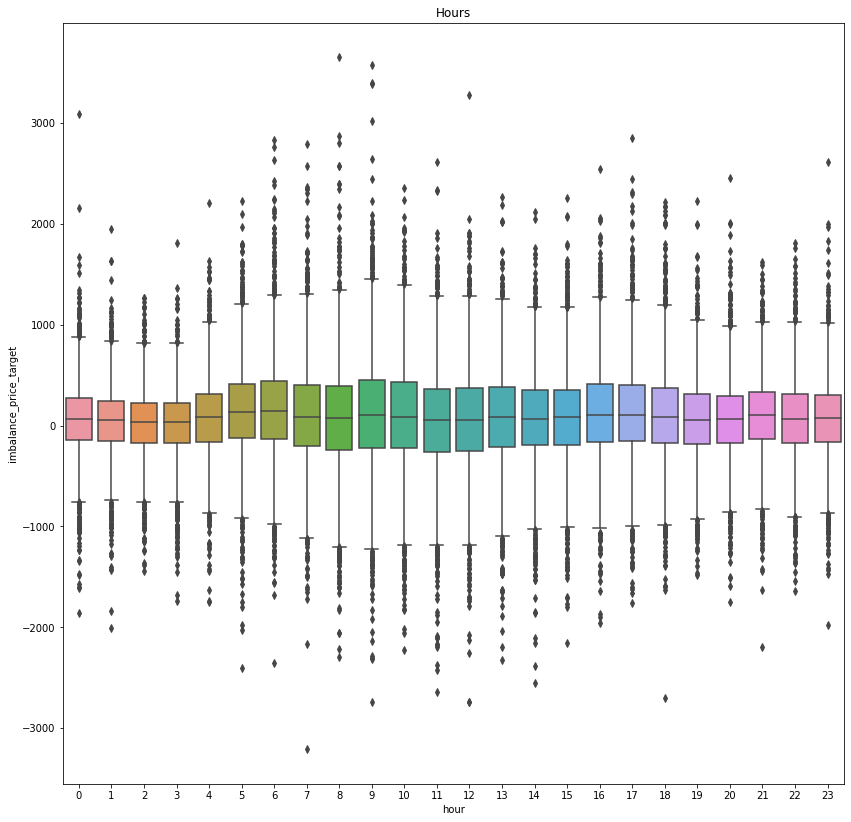

In [77]:
plt.figure(figsize=(14,14))
sns.boxplot(data=bigdata, x=bigdata['hour'], y=bigdata['imbalance_price_target'])
plt.title('Hours')

Text(0.5, 1.0, 'Years')

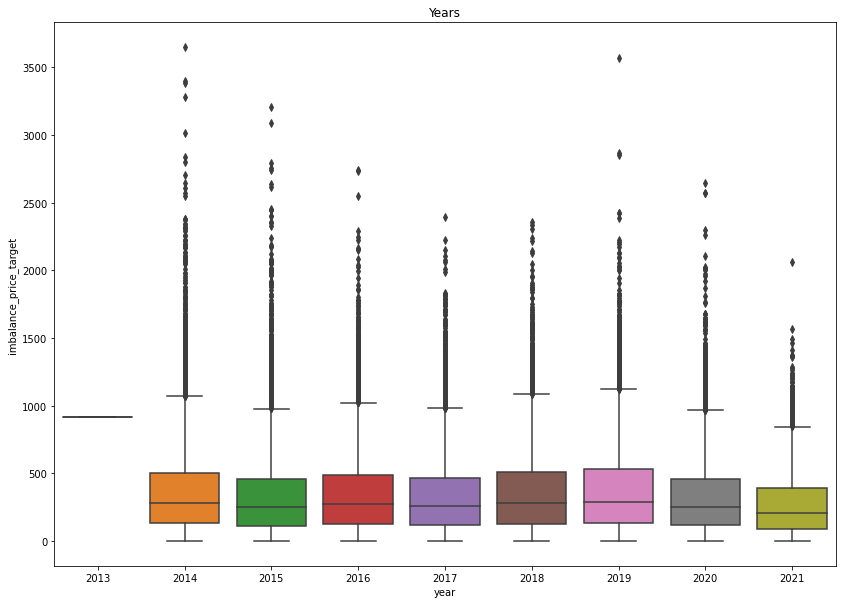

In [72]:
plt.figure(figsize=(14,10))
sns.boxplot(data=bigdata, x=bigdata['year'], y=np.abs(bigdata['imbalance_price_target']))
plt.title('Years')

Text(0.5, 1.0, 'Months')

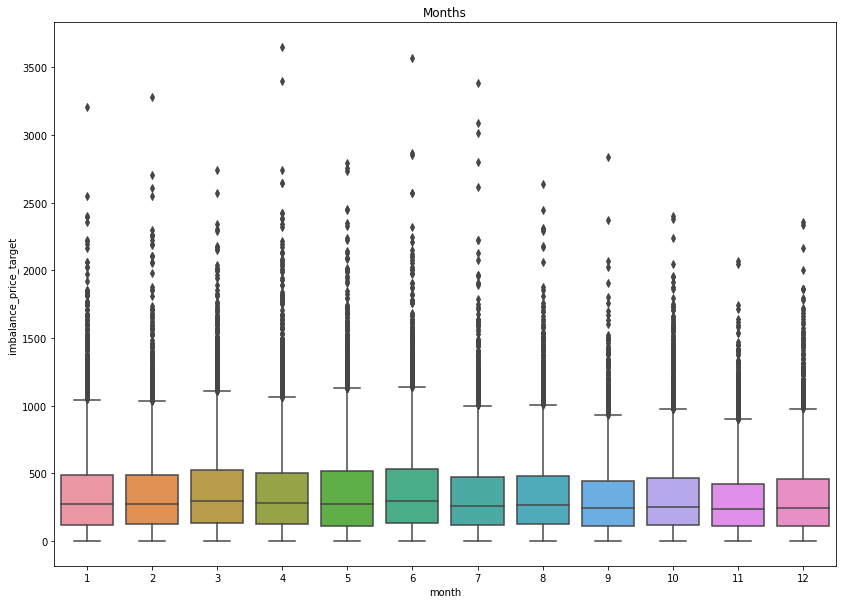

In [73]:
plt.figure(figsize=(14,10))
sns.boxplot(data=bigdata, x=bigdata['month'], y=np.abs(bigdata['imbalance_price_target']))
plt.title('Months')

Text(0.5, 1.0, 'Weekdays')

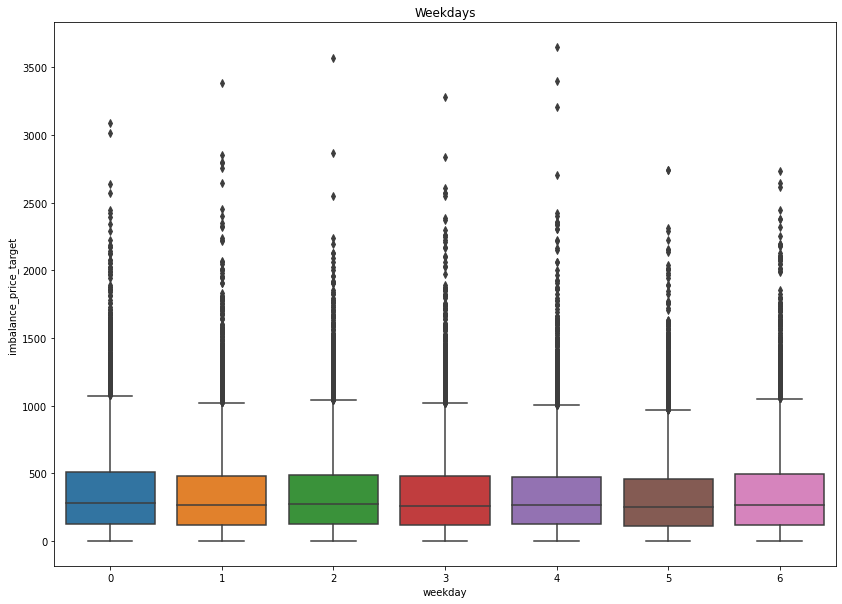

In [74]:
plt.figure(figsize=(14,10))
sns.boxplot(data=bigdata, x=bigdata['weekday'], y=np.abs(bigdata['imbalance_price_target']))
plt.title('Weekdays')

Text(0.5, 1.0, 'Hours')

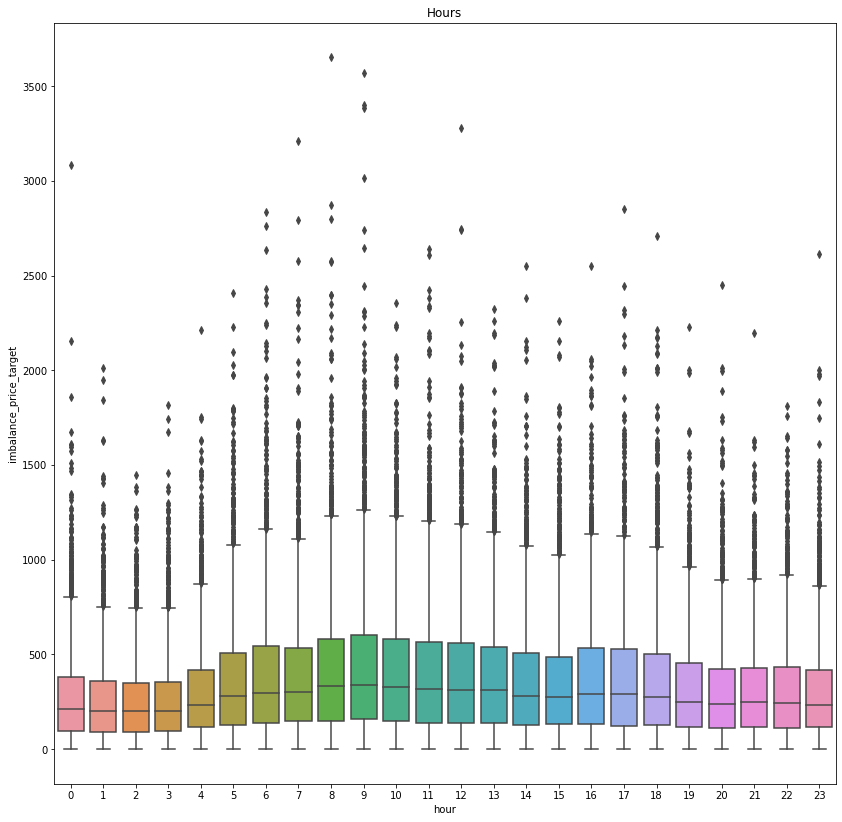

In [76]:
plt.figure(figsize=(14,14))
sns.boxplot(data=bigdata, x=bigdata['hour'], y=np.abs(bigdata['imbalance_price_target']))
plt.title('Hours')

In [13]:
data = pd.read_csv("../data/dataset_merged.csv")

In [14]:
data = data.set_index('dt_start_utc')

In [15]:
data

,windspeed_ms,epex_da_de_eur_mwh,solar_mw_fiftyhertz,solar_mw_tennet,solar_mw_amprion,solar_mw_transnetbw,solar_mw_nrv,fc_da,fc_load_50H,fc_load_DE,...,fc_onshore_DK1,offshore_mw_fiftyhertz,offshore_mw_tennet,offshore_mw_nrv,onshore_mw_fiftyhertz,onshore_mw_tennet,onshore_mw_amprion,onshore_mw_transnetbw,onshore_mw_nrv,imbalance_price_target
dt_start_utc,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,13.7925,10.07,0.0,0.00,0.0,0.0,0.00,29.730,6150.5,41218.5,...,2342.0,1014.99,4669.35,5684.34,9231.31,11624.89,3039.50,105.45,24001.15,-329.6045
2019-01-01 01:00:00,14.3600,-4.08,0.0,0.00,0.0,0.0,0.00,26.050,6029.0,40139.0,...,2227.0,659.54,4674.65,5334.19,10012.16,12762.32,3576.50,112.04,26463.02,-283.8000
2019-01-01 02:00:00,15.0180,-9.91,0.0,0.00,0.0,0.0,0.00,23.760,6057.0,39917.0,...,2163.0,615.41,4663.13,5278.54,10852.08,13988.91,4094.75,164.29,29100.03,-334.7170
2019-01-01 03:00:00,14.8220,-7.41,0.0,0.00,0.0,0.0,0.00,20.950,6122.5,40282.0,...,2108.0,493.95,4666.95,5160.90,11761.89,14809.73,4685.25,226.52,31483.39,117.6665
2019-01-01 04:00:00,14.5930,-12.55,0.0,0.00,0.0,0.0,0.00,15.770,6152.0,40528.0,...,2142.0,333.78,4668.18,5001.96,13125.93,15131.73,5024.50,315.82,33597.98,-323.3150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 19:00:00,6.1635,49.92,0.0,0.03,0.0,0.0,0.03,53.555,11108.5,56709.0,...,631.0,128.69,4628.28,4756.97,651.60,3648.29,1620.00,179.00,6098.89,-130.1485
2020-09-30 20:00:00,5.9385,42.79,0.0,0.05,0.0,0.0,0.05,46.200,10454.5,53241.0,...,701.0,140.73,5055.73,5196.46,707.77,3953.82,1977.75,259.00,6898.34,-248.8910
2020-09-30 21:00:00,6.0630,35.02,0.0,0.05,0.0,0.0,0.05,40.030,9635.5,49149.0,...,765.0,174.31,5165.00,5339.31,779.20,3957.25,2123.75,284.25,7144.45,157.6065


In [16]:
imb = data['imbalance_price_target']

In [17]:
imb = pd.DataFrame(imb)

In [18]:
imb.head()

,imbalance_price_target
dt_start_utc,
2019-01-01 00:00:00,-329.6045
2019-01-01 01:00:00,-283.8000
2019-01-01 02:00:00,-334.7170
2019-01-01 03:00:00,117.6665
2019-01-01 04:00:00,-323.3150


In [19]:
imb.index = pd.to_datetime(imb.index)

In [20]:
imb.index.day

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            30, 30, 30, 30, 30, 30, 30, 30, 30, 30],
           dtype='int64', name='dt_start_utc', length=15336)

In [21]:
# add time features
imb['year'] = imb.index.year
imb['month'] = imb.index.month
imb['day'] = imb.index.day
imb['weekday'] = imb.index.weekday
imb['hour'] = imb.index.hour

In [22]:
imb.head()

,imbalance_price_target,year,month,day,weekday,hour
dt_start_utc,,,,,,
2019-01-01 00:00:00,-329.6045,2019,1,1,1,0
2019-01-01 01:00:00,-283.8000,2019,1,1,1,1
2019-01-01 02:00:00,-334.7170,2019,1,1,1,2
2019-01-01 03:00:00,117.6665,2019,1,1,1,3
2019-01-01 04:00:00,-323.3150,2019,1,1,1,4


In [23]:
imb19 = imb[imb.index < '2020-01-01 00:00:00']

### Plots imbalance energy price

#### Monthly distribution

In [26]:
imb19_months = imb19.groupby('month').median()['imbalance_price_target']

In [27]:
imb19_months = pd.DataFrame(imb19_months)

In [28]:
imb19_months.rename(columns={'imbalance_price_target':'imb_price_median'}, inplace=True)

In [29]:
imb19_months['imb_price_min'] = imb19.groupby('month').min()['imbalance_price_target']

In [30]:
imb19_months['imb_price_max'] = imb19.groupby('month').max()['imbalance_price_target']

In [31]:
imb19_months

,imb_price_median,imb_price_min,imb_price_max
month,,,
1,150.61200,-1477.8685,2023.5345
2,10.00400,-1627.9480,1391.0755
3,67.15450,-1824.2100,2001.2095
4,155.95575,-2425.3730,2427.6355
5,138.80800,-1829.4750,2226.3110
6,136.50075,-1632.5330,3571.2205
7,98.25375,-1355.7490,2130.7945
8,-28.52175,-1306.4815,1507.1845
9,-76.43475,-1162.4715,1057.8315


Text(0.5, 1.0, 'Imbalance price - Median')

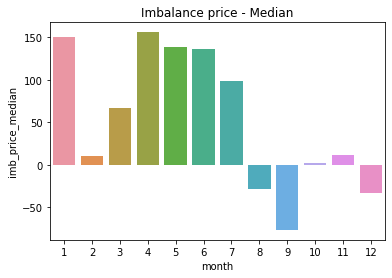

In [32]:
# distribution per month
sns.barplot(data=imb19_months, x=imb19_months.index, y=imb19_months['imb_price_median'])
plt.title('Imbalance price - Median')

Text(0.5, 1.0, 'Imbalance price - Min')

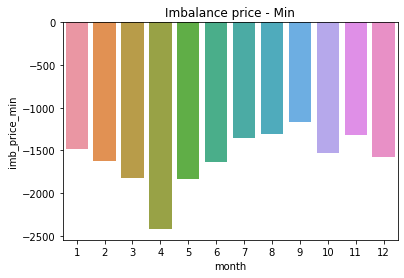

In [33]:
# distribution per month
sns.barplot(data=imb19_months, x=imb19_months.index, y=imb19_months['imb_price_min'])
plt.title('Imbalance price - Min')

Text(0.5, 1.0, 'Imbalance price - Max')

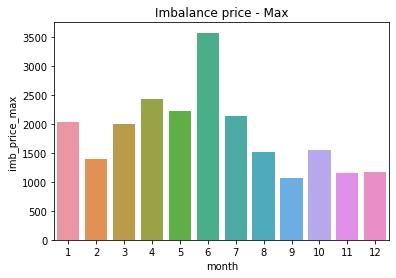

In [34]:
# distribution per month
sns.barplot(data=imb19_months, x=imb19_months.index, y=imb19_months['imb_price_max'])
plt.title('Imbalance price - Max')

[Text(0, 3, '2023.53'),
 Text(0, 3, '1391.08'),
 Text(0, 3, '2001.21'),
 Text(0, 3, '2427.64'),
 Text(0, 3, '2226.31'),
 Text(0, 3, '3571.22'),
 Text(0, 3, '2130.79'),
 Text(0, 3, '1507.18'),
 Text(0, 3, '1057.83'),
 Text(0, 3, '1553.23'),
 Text(0, 3, '1157.11'),
 Text(0, 3, '1175.34')]

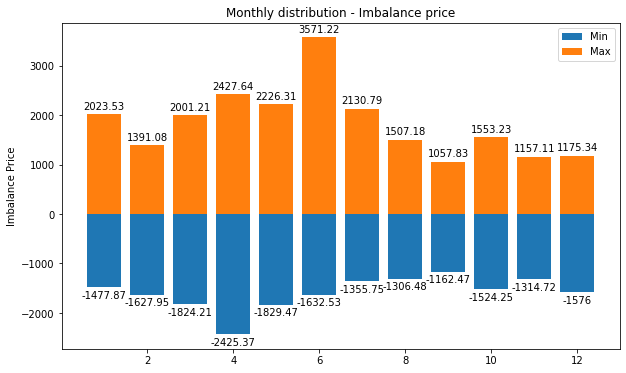

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
min = ax.bar(imb19_months.index, imb19_months['imb_price_min'], label='Min')
max = ax.bar(imb19_months.index, imb19_months['imb_price_max'], label='Max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Imbalance Price')
ax.set_title('Monthly distribution - Imbalance price')
ax.legend()

ax.bar_label(min, padding=3)
ax.bar_label(max, padding=3)

#### Weekday distribution

In [36]:
imb19_weekdays = imb19.groupby('weekday').median()['imbalance_price_target']

In [37]:
imb19_weekdays = pd.DataFrame(imb19_weekdays)

In [38]:
imb19_weekdays.rename(columns={'imbalance_price_target':'imb_price_median'}, inplace=True)

In [39]:
imb19_weekdays['imb_price_min'] = imb19.groupby('weekday').min()['imbalance_price_target']

In [40]:
imb19_weekdays['imb_price_max'] = imb19.groupby('weekday').max()['imbalance_price_target']

In [41]:
imb19_weekdays

,imb_price_median,imb_price_min,imb_price_max
weekday,,,
0,67.48225,-2425.373,2051.6785
1,33.87050,-1569.671,2850.0050
2,40.63300,-1824.210,3571.2205
3,54.21025,-2170.842,2385.6270
4,52.31225,-1491.564,2427.6355
5,-20.62500,-1627.948,1766.0690
6,52.20225,-2195.248,1669.0755


Text(0.5, 1.0, 'Imbalance price - Median')

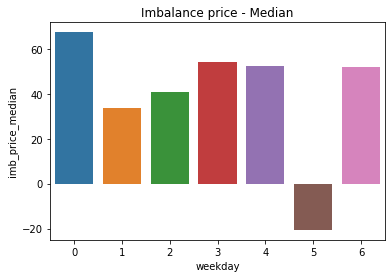

In [42]:
# distribution per month
sns.barplot(data=imb19_weekdays, x=imb19_weekdays.index, y=imb19_weekdays['imb_price_median'])
plt.title('Imbalance price - Median')

Text(0.5, 1.0, 'Imbalance price - Min')

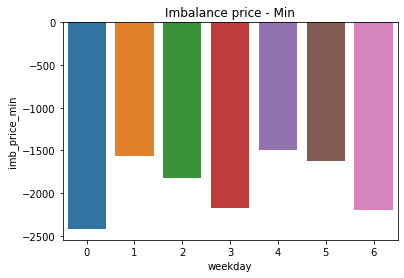

In [43]:
# distribution per month
sns.barplot(data=imb19_weekdays, x=imb19_weekdays.index, y=imb19_weekdays['imb_price_min'])
plt.title('Imbalance price - Min')

Text(0.5, 1.0, 'Imbalance price - Max')

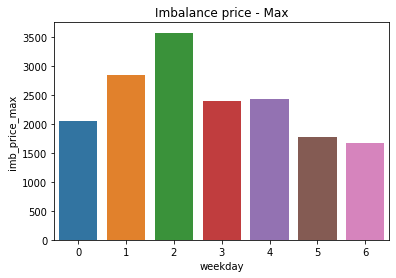

In [44]:
# distribution per month
sns.barplot(data=imb19_weekdays, x=imb19_weekdays.index, y=imb19_weekdays['imb_price_max'])
plt.title('Imbalance price - Max')

[Text(0, 3, '2051.68'),
 Text(0, 3, '2850.01'),
 Text(0, 3, '3571.22'),
 Text(0, 3, '2385.63'),
 Text(0, 3, '2427.64'),
 Text(0, 3, '1766.07'),
 Text(0, 3, '1669.08')]

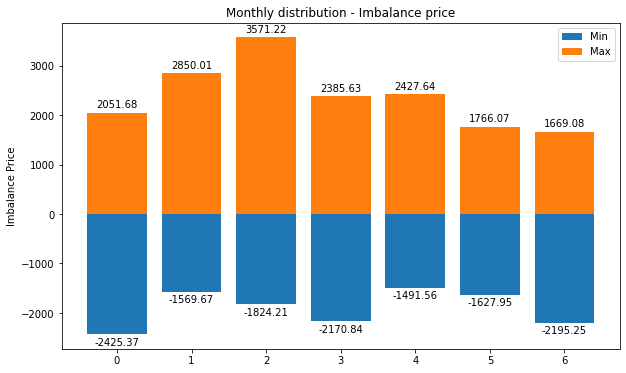

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
min = ax.bar(imb19_weekdays.index, imb19_weekdays['imb_price_min'], label='Min')
max = ax.bar(imb19_weekdays.index, imb19_weekdays['imb_price_max'], label='Max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Imbalance Price')
ax.set_title('Monthly distribution - Imbalance price')
ax.legend()

ax.bar_label(min, padding=3)
ax.bar_label(max, padding=3)

#### Hourly distribution

In [46]:
imb19_hours = imb19.groupby('hour').median()['imbalance_price_target']

In [47]:
imb19_hours = pd.DataFrame(imb19_hours)

In [48]:
imb19_hours.rename(columns={'imbalance_price_target':'imb_price_median'}, inplace=True)

In [49]:
imb19_hours['imb_price_min'] = imb19.groupby('hour').min()['imbalance_price_target']

In [50]:
imb19_hours['imb_price_max'] = imb19.groupby('hour').max()['imbalance_price_target']

In [51]:
imb19_hours

,imb_price_median,imb_price_min,imb_price_max
hour,,,
0,9.1850,-1576.0000,1673.3985
1,10.3530,-1060.0540,1085.6220
2,-25.7710,-1243.7060,1266.5335
3,-6.8030,-1740.7300,1815.0155
4,59.2800,-1441.4770,2211.2840
5,121.9110,-1303.6750,2098.9965
6,150.2755,-1452.1610,2427.6355
7,57.1660,-1491.5640,1652.0835
8,50.4080,-1829.4750,2870.6900


Text(0.5, 1.0, 'Imbalance price - Median')

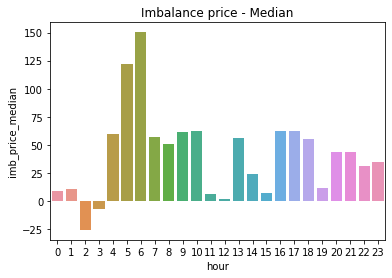

In [52]:
# distribution per hour
sns.barplot(data=imb19_hours, x=imb19_hours.index, y=imb19_hours['imb_price_median'])
plt.title('Imbalance price - Median')

Text(0.5, 1.0, 'Imbalance price - Min')

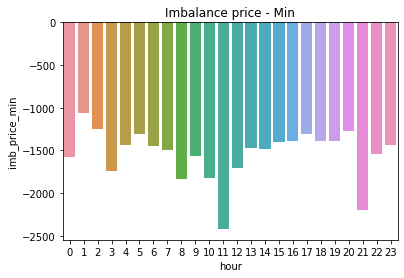

In [53]:
# distribution per hour
sns.barplot(data=imb19_hours, x=imb19_hours.index, y=imb19_hours['imb_price_min'])
plt.title('Imbalance price - Min')

Text(0.5, 1.0, 'Imbalance price - Max')

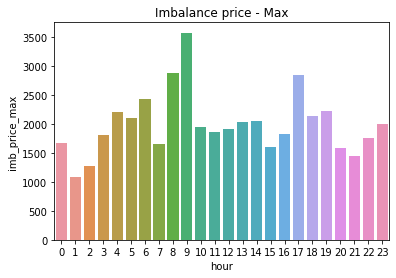

In [54]:
# distribution per hour
sns.barplot(data=imb19_hours, x=imb19_hours.index, y=imb19_hours['imb_price_max'])
plt.title('Imbalance price - Max')

[Text(0, 3, '1673.4'),
 Text(0, 3, '1085.62'),
 Text(0, 3, '1266.53'),
 Text(0, 3, '1815.02'),
 Text(0, 3, '2211.28'),
 Text(0, 3, '2099'),
 Text(0, 3, '2427.64'),
 Text(0, 3, '1652.08'),
 Text(0, 3, '2870.69'),
 Text(0, 3, '3571.22'),
 Text(0, 3, '1942.97'),
 Text(0, 3, '1858.64'),
 Text(0, 3, '1910.29'),
 Text(0, 3, '2027.07'),
 Text(0, 3, '2051.68'),
 Text(0, 3, '1604.19'),
 Text(0, 3, '1817.78'),
 Text(0, 3, '2850.01'),
 Text(0, 3, '2130.79'),
 Text(0, 3, '2226.31'),
 Text(0, 3, '1576.8'),
 Text(0, 3, '1439.96'),
 Text(0, 3, '1757.29'),
 Text(0, 3, '1999.81')]

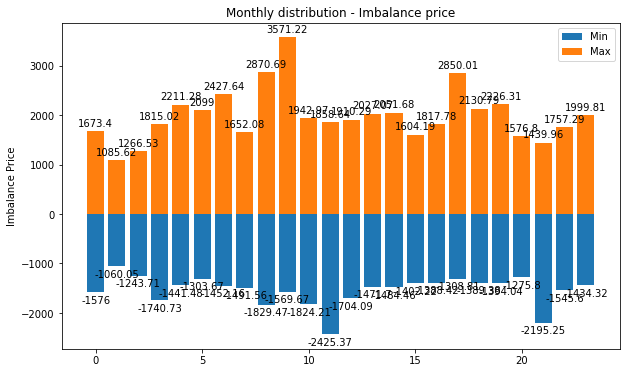

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))
min = ax.bar(imb19_hours.index, imb19_hours['imb_price_min'], label='Min')
max = ax.bar(imb19_hours.index, imb19_hours['imb_price_max'], label='Max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Imbalance Price')
ax.set_title('Monthly distribution - Imbalance price')
ax.legend()

ax.bar_label(min, padding=3)
ax.bar_label(max, padding=3)

In [56]:
wind = data['imbalance_price_target']

In [57]:
wind = pd.DataFrame(wind)

In [58]:
wind.head()

,imbalance_price_target
dt_start_utc,
2019-01-01 00:00:00,-329.6045
2019-01-01 01:00:00,-283.8000
2019-01-01 02:00:00,-334.7170
2019-01-01 03:00:00,117.6665
2019-01-01 04:00:00,-323.3150


In [59]:
wind['windspeed_ms'] = data['windspeed_ms']

In [60]:
wind.head()

,imbalance_price_target,windspeed_ms
dt_start_utc,,
2019-01-01 00:00:00,-329.6045,13.7925
2019-01-01 01:00:00,-283.8000,14.3600
2019-01-01 02:00:00,-334.7170,15.0180
2019-01-01 03:00:00,117.6665,14.8220
2019-01-01 04:00:00,-323.3150,14.5930


In [61]:
wind.describe()

,imbalance_price_target,windspeed_ms
count,15336.000000,15336.000000
mean,48.563995,6.758124
std,481.992548,2.905778
min,-2425.373000,0.972500
25%,-240.662500,4.708375
50%,35.710500,6.353750
75%,317.248000,8.371000
max,3571.220500,22.438000


In [62]:
wind['windspeed_0_5'] = wind['windspeed_ms'].apply(lambda x: 1 if x <= 5 else 0)
wind['windspeed_5_10'] = wind['windspeed_ms'].apply(lambda x: 1 if (x > 5 and x <=10) else 0)
wind['windspeed_10_15'] = wind['windspeed_ms'].apply(lambda x: 1 if (x > 10 and x <=15) else 0)
wind['windspeed_15_20'] = wind['windspeed_ms'].apply(lambda x: 1 if (x > 15 and x <=20) else 0)
wind['windspeed_20_25'] = wind['windspeed_ms'].apply(lambda x: 1 if x > 20 else 0)

In [63]:
wind.head()

,imbalance_price_target,windspeed_ms,windspeed_0_5,windspeed_5_10,windspeed_10_15,windspeed_15_20,windspeed_20_25
dt_start_utc,,,,,,,
2019-01-01 00:00:00,-329.6045,13.7925,0,0,1,0,0
2019-01-01 01:00:00,-283.8000,14.3600,0,0,1,0,0
2019-01-01 02:00:00,-334.7170,15.0180,0,0,0,1,0
2019-01-01 03:00:00,117.6665,14.8220,0,0,1,0,0
2019-01-01 04:00:00,-323.3150,14.5930,0,0,1,0,0
